In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import pardir, path
import re
import seaborn as sns
sns.set()
%matplotlib inline

In [14]:
# make mpl able to render Thai
from matplotlib import rcParams
rcParams['font.family'] = 'Krungthep'
# rcParams['font.serif'] = ['Sukhumvit Set']
rcParams.update({
    'font.size': 16,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'axes.titlesize': 24,
})

### Helper functions

In [3]:
# plotter
def add_bar_value(ax, bars):
    for idx, rect in enumerate(bars):
        chart_width = ax.get_xlim()[1]
        h = rect.get_height()
        w = rect.get_width()

#         # vertical
#         ax.text(rect.get_x() + w/2., 1.0*h,
#                 f'{int(h)}',
#                 ha='center', va='bottom')
        # horizontal
        ax.annotate(f'{int(w)}',
                    (w+(chart_width/165),
                     idx-(h/6)))

def plot_bar_with_value(data, label, title):
    plt.figure(figsize=(18,9))
    ax = data.plot(kind='barh',
                   # rot=60,
                   width=0.8,
                   color=plt.cm.Paired(np.arange(len(data))),
                  )
    
    ax.set_yticklabels(label)
    ax.set_title(title)
    bars = ax.patches
    
    add_bar_value(ax, bars)

In [172]:
def plot_pie(data, title, ax_parent):
    ax = data.plot(ax=ax_parent,
                   kind='pie',
                   colors=['lightcoral', 'palegreen'],
#                    colormap='Paired',
                   autopct=absolute_value)

    ax.get_yaxis().set_visible(False)
    ax.set_title(title)
    ax_parent.axis('equal')
    
    return ax

def plot_pie_3subplots(data_dict):
    """
    data_dict={
        'title1': data1, 
        'title2': data2,
        'title3': data3,
    }
    """
    fig, axes = plt.subplots(ncols=3, figsize=(18,6))
    
    for idx, title in enumerate(data_dict):
        plot_pie(data_dict[title], title, ax_parent=axes[idx])

### Read data

In [4]:
si_df = pd.read_json(path.join(pardir, 'si-data.json'))

### Author

In [5]:
# remove ' Authenticated user' from user string
si_df.update(si_df.author.apply(lambda x: x.replace( ' Authenticated user', '')))

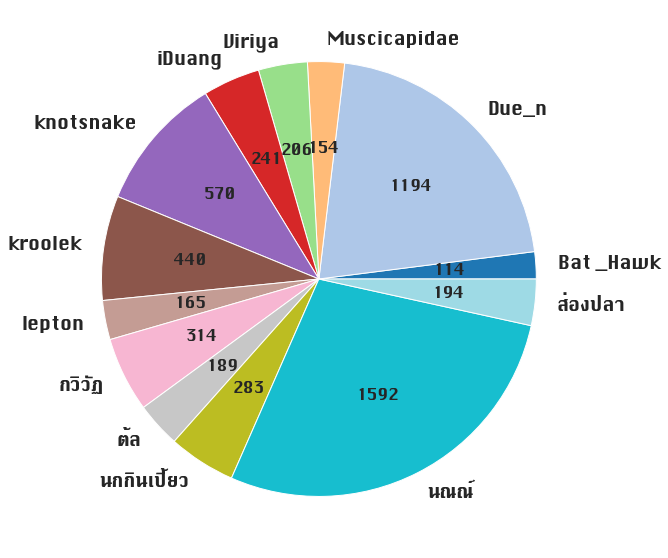

In [15]:
authors_count = si_df.groupby('author').id.count()
authors_gt100 = authors_count[authors_count >= 100]

plt.figure(figsize=(10,10))

def absolute_value(val):
    a  = int(val/100*authors_gt100.sum())
    return a

ax = authors_gt100.plot(kind='pie',
                        colormap='tab20',
                        autopct=absolute_value)
ax.get_yaxis().set_visible(False)

### Possibly wrong typos

In [63]:
print('---- All ranks in the Siamensis SI ----\n')
print(list(si_df['rank'].unique()))

# my suspect 
w_ranks = ['Achatina', 'Cryptozona', 'Gunus', 'Hemiplecta',
          'Incertae', 'Panicum', 'Speceis', 'Sub', 'Subpecies',
           'Tamarindus', 'Zingiber', 'species']

# add link to page
typo_df = si_df[si_df['rank'].isin(w_ranks)][['author', 'id', 'rank', 'title']]
link_col = 'http://www.siamensis.org/species_index?nid='+typo_df['id'].astype(str)+'#'+typo_df['id'].astype(str)
typo_df = typo_df.assign(link=link_col)
# not truncate the cell
pd.set_option('display.max_colwidth', -1)

# show
typo_df

---- All ranks in the Siamensis SI ----

['Phylum', 'Kingdom', 'Domain', 'Species', 'Genus', 'Family', 'Order', 'Class', 'Suborder', 'Infraorder', 'Subfamily', 'Subclass', 'Subgenus', 'Subtribe', 'Tribe', 'Superfamily', 'Subspecies', 'Subpecies', 'Gunus', 'Speceis', 'Incertae', 'infraorder', 'Legion', 'Cohort', 'Specie', 'species', 'Sublegion', 'Subdivision', 'Superorder', 'Division', 'Infraclass', 'Achatina', 'Cryptozona', 'Hemiplecta', 'Sub', 'Panicum', 'Zingiber', 'Tamarindus', 'Life']


,author,id,rank,title,link
633,france,40273,Subpecies,Dorcus (Serrognathus) reichei reichei,http://www.siamensis.org/species_index?nid=40273#40273
805,iDuang,6996,Gunus,Cheirotonus,http://www.siamensis.org/species_index?nid=6996#6996
1153,กวิวัฏ,1357,Speceis,Xyleutes ceramica Walker 1865,http://www.siamensis.org/species_index?nid=1357#1357
1154,กวิวัฏ,1349,Speceis,Xyleutes mineus Cramer 1777,http://www.siamensis.org/species_index?nid=1349#1349
1155,กวิวัฏ,1356,Speceis,Xyleutes persona,http://www.siamensis.org/species_index?nid=1356#1356
1156,กวิวัฏ,1348,Speceis,"Xyleutes strix (Linnaeus, 1758)",http://www.siamensis.org/species_index?nid=1348#1348
1949,Due_n,1068,Incertae,Sedis,http://www.siamensis.org/species_index?nid=1068#1068
3184,Bat _Hawk,8152,species,Macronus ptilosus,http://www.siamensis.org/species_index?nid=8152#8152
4633,Mb.,5375,species,Pomacanthus annularis,http://www.siamensis.org/species_index?nid=5375#5375
5569,หอยทากชรา,5783,Achatina,fulica,http://www.siamensis.org/species_index?nid=5783#5783


### Description & Images

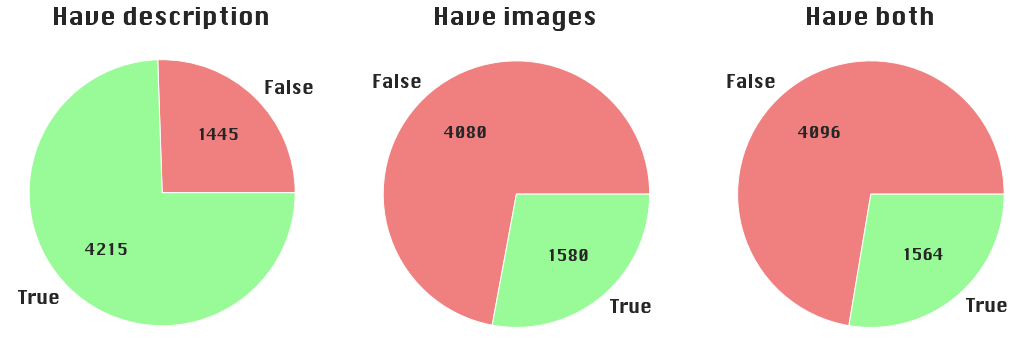

In [173]:
have_des = si_df.groupby([mask_description]).count().id
have_imgs = si_df.groupby([mask_images]).count().id
have_both = si_df.groupby([mask_description & mask_images]).count().id

plot_pie_3subplots({
    'Have description': have_des,
    'Have images': have_imgs,
    'Have both': have_both
})

### Phylum & Division

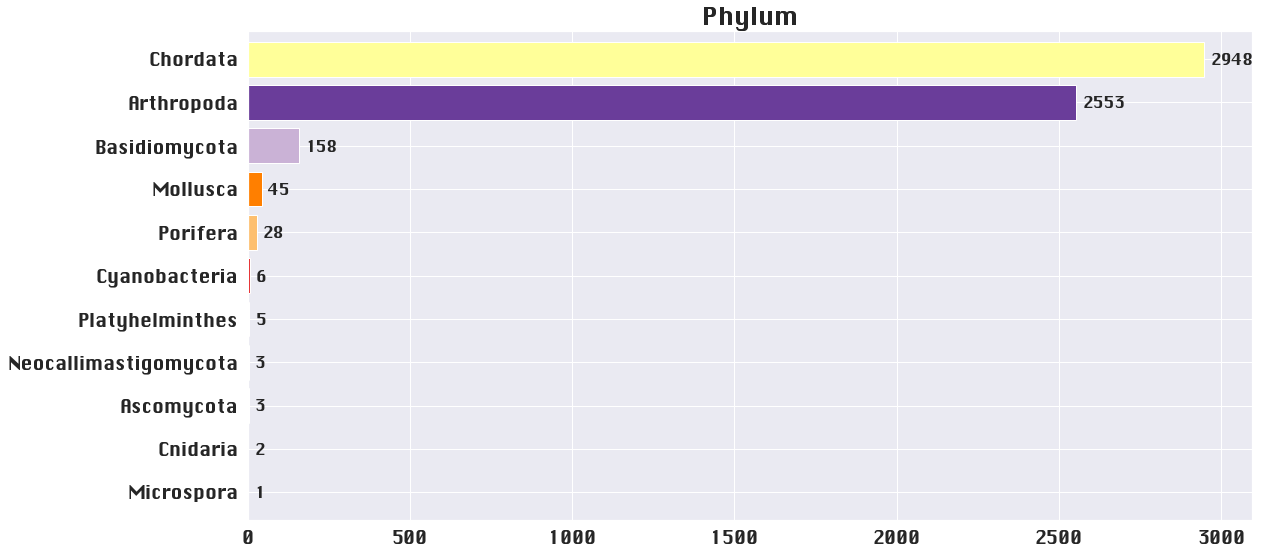

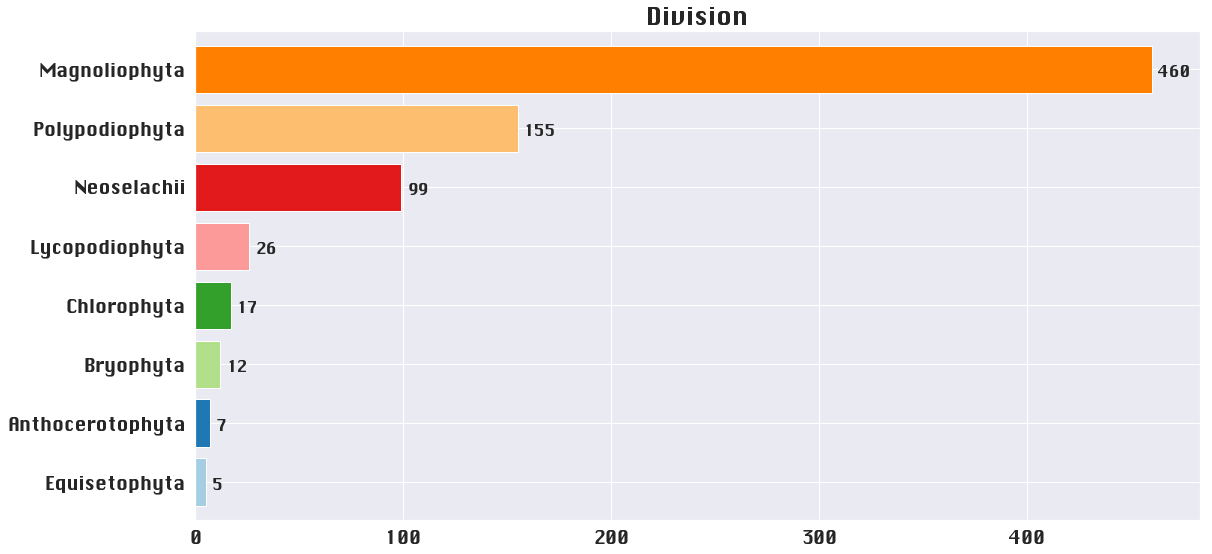

In [16]:
mask_phylum = (si_df['rank'] == 'Phylum')
mask_division = (si_df['rank'] == 'Division')
mask_have_children = (si_df['num_children'] > 0)
phy_have_children = mask_phylum & mask_have_children
div_have_children = mask_division & mask_have_children

plot_bar_with_value(
    data=si_df[phy_have_children].sort_values(by=['num_children']).num_children,
    label=si_df[phy_have_children].sort_values(by=['num_children']).title,
    title='Phylum'
)

plot_bar_with_value(
    data=si_df[div_have_children].sort_values(by=['num_children']).num_children,
    label=si_df[div_have_children].sort_values(by=['num_children']).title,
    title='Division'
)
